In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from dotenv import load_dotenv
load_dotenv();

In [51]:
import os
import numpy as np
import pandas as pd

In [52]:
import src.features.build_features as FeaturesManager

In [57]:
seasons_year = [2016, 2017, 2018, 2019]
df = FeaturesManager.build_features(seasons_year)

In [32]:
df.head()

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Goalie,Strength,X,...,Last event Y,Last event elapsed time,Last event distance,st_X,st_Y,Shot distance,Shot angle,Is Goal,Is Empty,Game seconds
0,2016020001,43,1,Toronto Maple Leafs (TOR),GOAL,Wrist Shot,Auston Matthews,Craig Anderson,Even,-70.0,...,-8.0,3,17.492856,70.0,-1.0,19.026298,-3.012788,1,0,501
1,2016020001,61,1,Ottawa Senators (OTT),GOAL,Backhand,Bobby Ryan,Frederik Andersen,Even,82.0,...,-25.0,1,55.569776,82.0,3.0,7.615773,23.198591,1,0,626
2,2016020001,71,1,Ottawa Senators (OTT),GOAL,Slap Shot,Erik Karlsson,Frederik Andersen,Even,34.0,...,-8.0,5,35.693137,34.0,-1.0,55.009090,-1.041627,1,0,769
3,2016020001,80,1,Toronto Maple Leafs (TOR),GOAL,Snap Shot,Auston Matthews,Craig Anderson,Even,-76.0,...,3.0,5,63.134776,76.0,28.0,30.870698,65.095231,1,0,858
4,2016020001,132,2,Toronto Maple Leafs (TOR),GOAL,Wrist Shot,Auston Matthews,Craig Anderson,Even,76.0,...,-25.0,16,165.366260,76.0,-14.0,19.104973,-47.121096,1,0,85


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298117 entries, 0 to 298116
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Game ID                  298117 non-null  object 
 1   Event Index              298117 non-null  int64  
 2   Period                   298117 non-null  int64  
 3   Team                     298117 non-null  object 
 4   Type                     298117 non-null  object 
 5   Shot Type                298080 non-null  object 
 6   Shooter                  298117 non-null  object 
 7   Goalie                   298117 non-null  object 
 8   Strength                 28290 non-null   object 
 9   X                        298117 non-null  float64
 10  Y                        298117 non-null  float64
 11  Last event type          298117 non-null  object 
 12  Last event X             295999 non-null  float64
 13  Last event Y             295999 non-null  float64
 14  Last

In [34]:
df['Shot distance'].max()

189.6549498431296

In [35]:
df['Shot distance'].min()

0.0

In [36]:
df['Shot angle'].max()

180.0

In [37]:
df['Shot angle'].min()

-173.6598082540901

In [45]:
distance_bins = list(range(0, 195, 5))
angle_bins = list(range(0, 185, 5)) # All but the last (righthand-most) bin is half-open in Numpy


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0.5, 1.0, 'Goals')

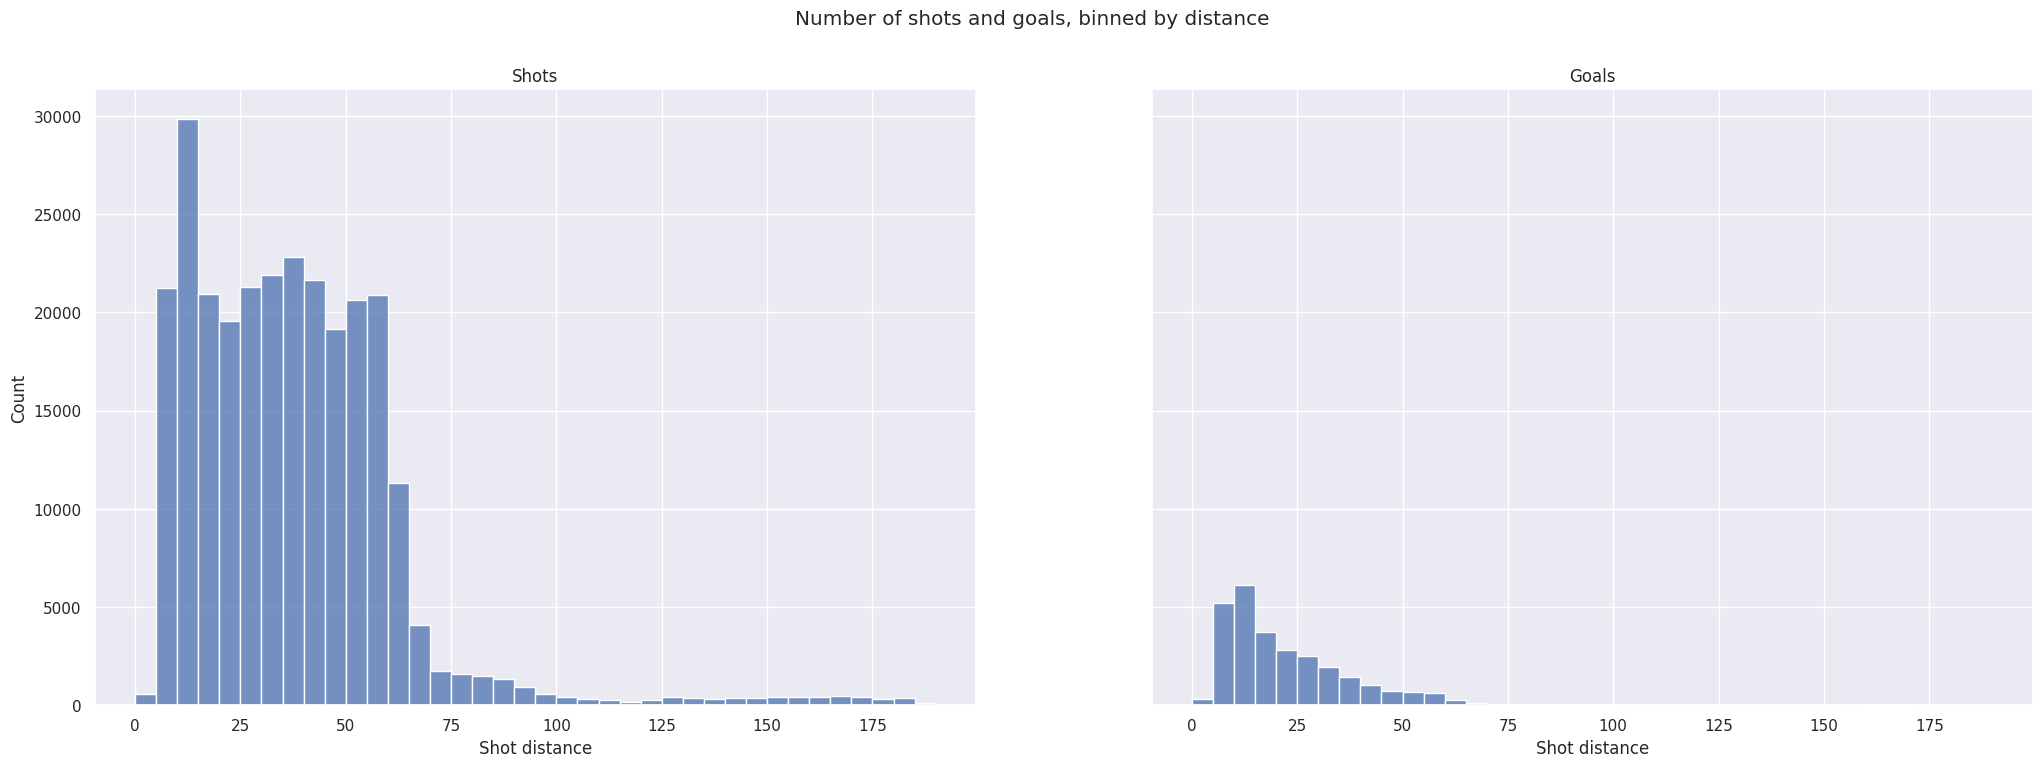

In [47]:
# Q1 - Hist1
fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of shots and goals, binned by distance')

sns.histplot(ax=axes[0], data=df, x=df[df['Is Goal'] == 0]["Shot distance"], bins=distance_bins)
axes[0].set_title('Shots')

sns.histplot(ax=axes[1], data=df, x=df[df['Is Goal'] == 1]["Shot distance"], bins=distance_bins)
axes[1].set_title('Goals')

Text(0.5, 1.0, 'Goals')

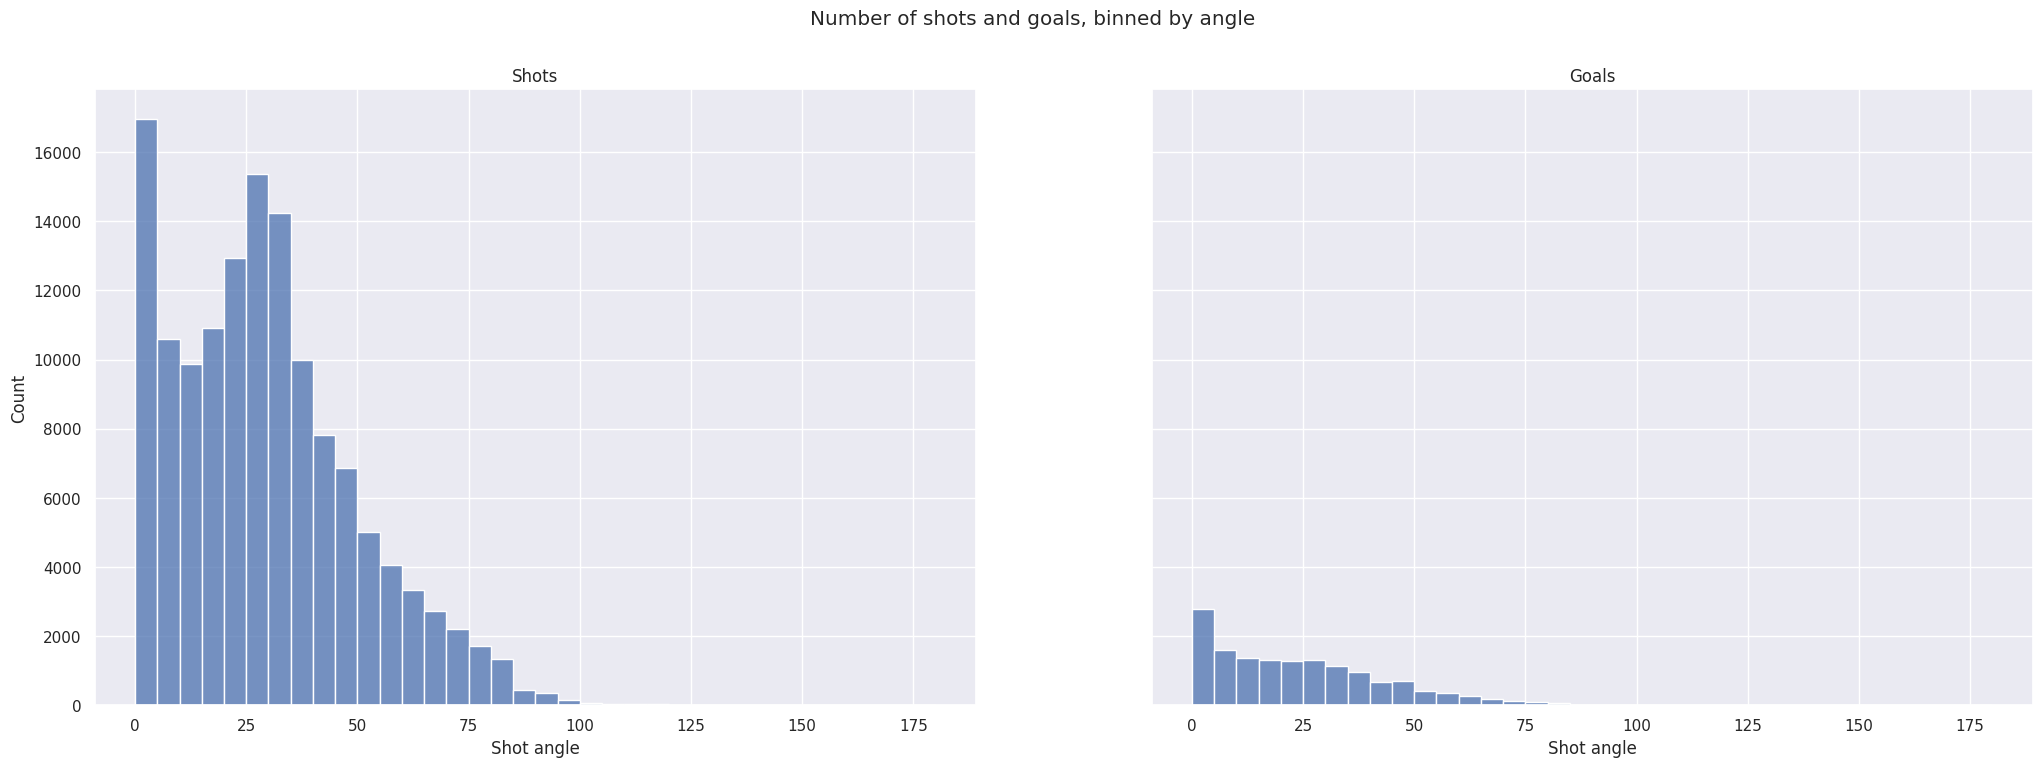

In [48]:
# Q1 - Hist2
fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of shots and goals, binned by angle')

sns.histplot(ax=axes[0], data=df, x=df[df['Is Goal'] == 0]["Shot angle"], bins=angle_bins)
axes[0].set_title('Shots')

sns.histplot(ax=axes[1], data=df, x=df[df['Is Goal'] == 1]["Shot angle"], bins=angle_bins)
axes[1].set_title('Goals')

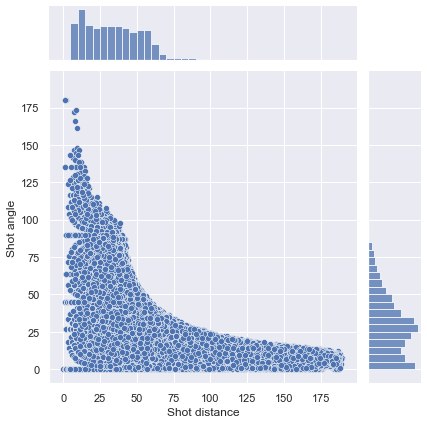

In [23]:
# Q1 - Hist3
sns.jointplot(data=df, x=df["Shot distance"], y=df["Shot angle"].abs(), marginal_kws=dict(bins=distance_bins)) # I took the absolute value

In [24]:
# Q2
distance_bins_2 = list(range(0, 195, 10))
angle_bins_2 = list(range(0, 185, 10))
df['Angle Bins'] = pd.cut(df['Shot angle'].abs(), bins=angle_bins_2, include_lowest=True)
df['Distance Bins'] = pd.cut(df['Shot distance'], bins=distance_bins_2, include_lowest=True)

In [26]:
df_angle = pd.pivot_table(df, values='Is Goal', index='Angle Bins', columns='Type',  aggfunc='count').reset_index()
df_angle.columns.name=None
df_angle

,Angle Bins,GOAL,SHOT
0,"(-0.001, 10.0]",7276,48258
1,"(10.0, 20.0]",5185,40993
2,"(20.0, 30.0]",5104,56300
3,"(30.0, 40.0]",4262,47679
4,"(40.0, 50.0]",2852,30274
5,"(50.0, 60.0]",1715,19372
6,"(60.0, 70.0]",986,13125
7,"(70.0, 80.0]",526,8491
8,"(80.0, 90.0]",211,4270
9,"(90.0, 100.0]",59,538


In [27]:
df_distance = pd.pivot_table(df, values='Is Goal', index='Distance Bins', columns='Type',  aggfunc='count').reset_index()
df_distance.columns.name=None
df_distance

,Distance Bins,GOAL,SHOT
0,"(-0.001, 10.0]",5796,23137
1,"(10.0, 20.0]",9658,49958
2,"(20.0, 30.0]",5276,40669
3,"(30.0, 40.0]",3364,44690
4,"(40.0, 50.0]",1751,40823
5,"(50.0, 60.0]",1303,41347
6,"(60.0, 70.0]",390,15327
7,"(70.0, 80.0]",95,3360
8,"(80.0, 90.0]",90,2791
9,"(90.0, 100.0]",85,1521


In [28]:
def calculate_percentage(a, b):
    try:
        result = (a/(a+b))*100
    except:
        result = np.nan
    return result

In [29]:
df_angle['Goal Percentage'] = df_angle.apply(lambda row : calculate_percentage(row['GOAL'], row['SHOT']), axis=1)
df_distance['Goal Percentage'] = df_distance.apply(lambda row : calculate_percentage(row['GOAL'], row['SHOT']), axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '(-0.001, 10.0]'),
  Text(1, 0, '(10.0, 20.0]'),
  Text(2, 0, '(20.0, 30.0]'),
  Text(3, 0, '(30.0, 40.0]'),
  Text(4, 0, '(40.0, 50.0]'),
  Text(5, 0, '(50.0, 60.0]'),
  Text(6, 0, '(60.0, 70.0]'),
  Text(7, 0, '(70.0, 80.0]'),
  Text(8, 0, '(80.0, 90.0]'),
  Text(9, 0, '(90.0, 100.0]'),
  Text(10, 0, '(100.0, 110.0]'),
  Text(11, 0, '(110.0, 120.0]'),
  Text(12, 0, '(120.0, 130.0]'),
  Text(13, 0, '(130.0, 140.0]'),
  Text(14, 0, '(140.0, 150.0]'),
  Text(15, 0, '(150.0, 160.0]'),
  Text(16, 0, '(160.0, 170.0]'),
  Text(17, 0, '(170.0, 180.0]'),
  Text(18, 0, '(180.0, 190.0]')])

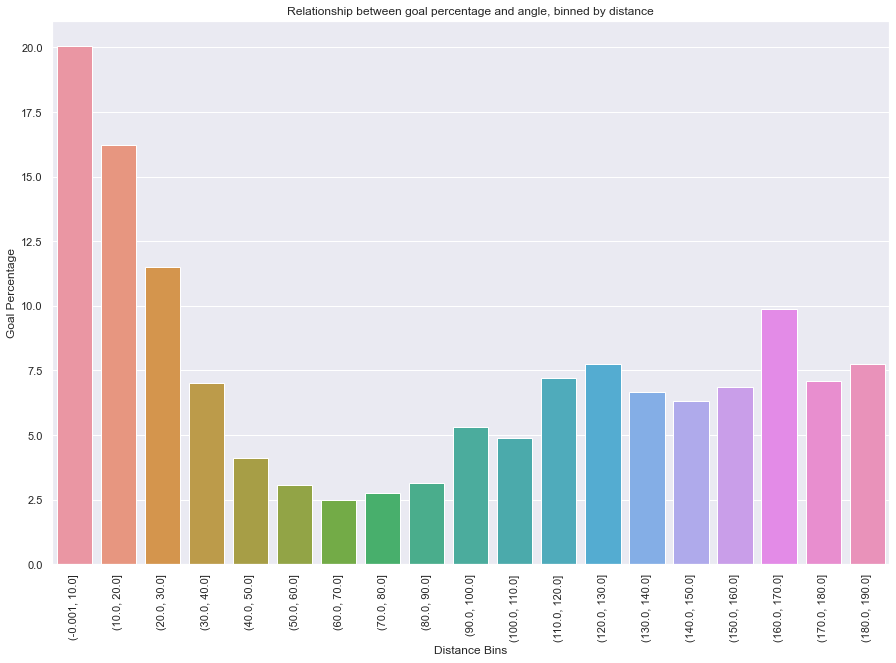

In [33]:
# Q2 - Hist1
plt.figure(figsize=(15, 10))
sns.barplot(data=df_distance, x="Distance Bins", y="Goal Percentage").set_title('Relationship between goal percentage and angle, binned by distance')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '(-0.001, 10.0]'),
  Text(1, 0, '(10.0, 20.0]'),
  Text(2, 0, '(20.0, 30.0]'),
  Text(3, 0, '(30.0, 40.0]'),
  Text(4, 0, '(40.0, 50.0]'),
  Text(5, 0, '(50.0, 60.0]'),
  Text(6, 0, '(60.0, 70.0]'),
  Text(7, 0, '(70.0, 80.0]'),
  Text(8, 0, '(80.0, 90.0]'),
  Text(9, 0, '(90.0, 100.0]'),
  Text(10, 0, '(100.0, 110.0]'),
  Text(11, 0, '(110.0, 120.0]'),
  Text(12, 0, '(120.0, 130.0]'),
  Text(13, 0, '(130.0, 140.0]'),
  Text(14, 0, '(140.0, 150.0]'),
  Text(15, 0, '(150.0, 160.0]'),
  Text(16, 0, '(160.0, 170.0]'),
  Text(17, 0, '(170.0, 180.0]')])

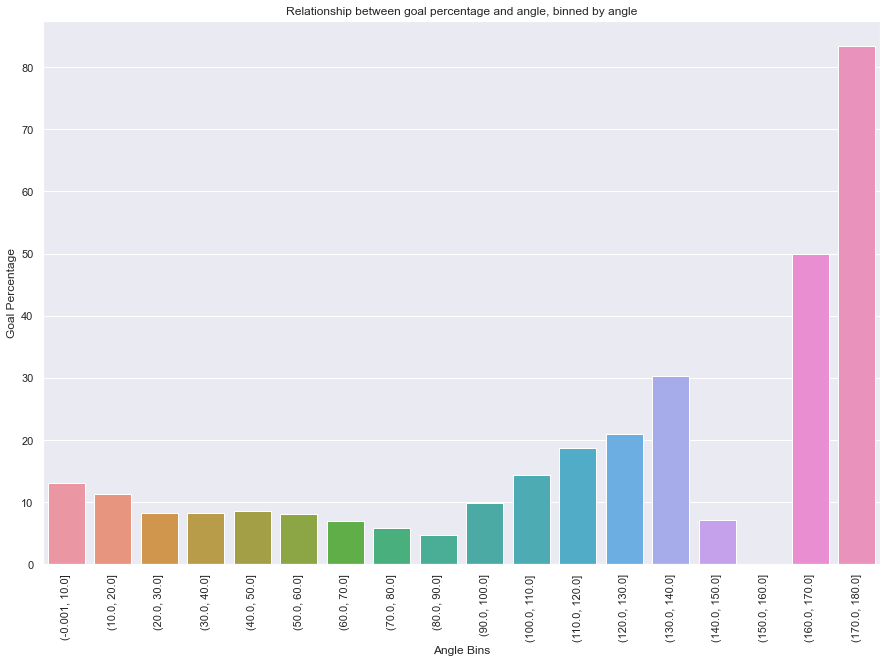

In [32]:
# Q2 - Hist2
plt.figure(figsize=(15, 10))
sns.barplot(data=df_angle, x="Angle Bins", y="Goal Percentage").set_title('Relationship between goal percentage and angle, binned by angle')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Empty Net')

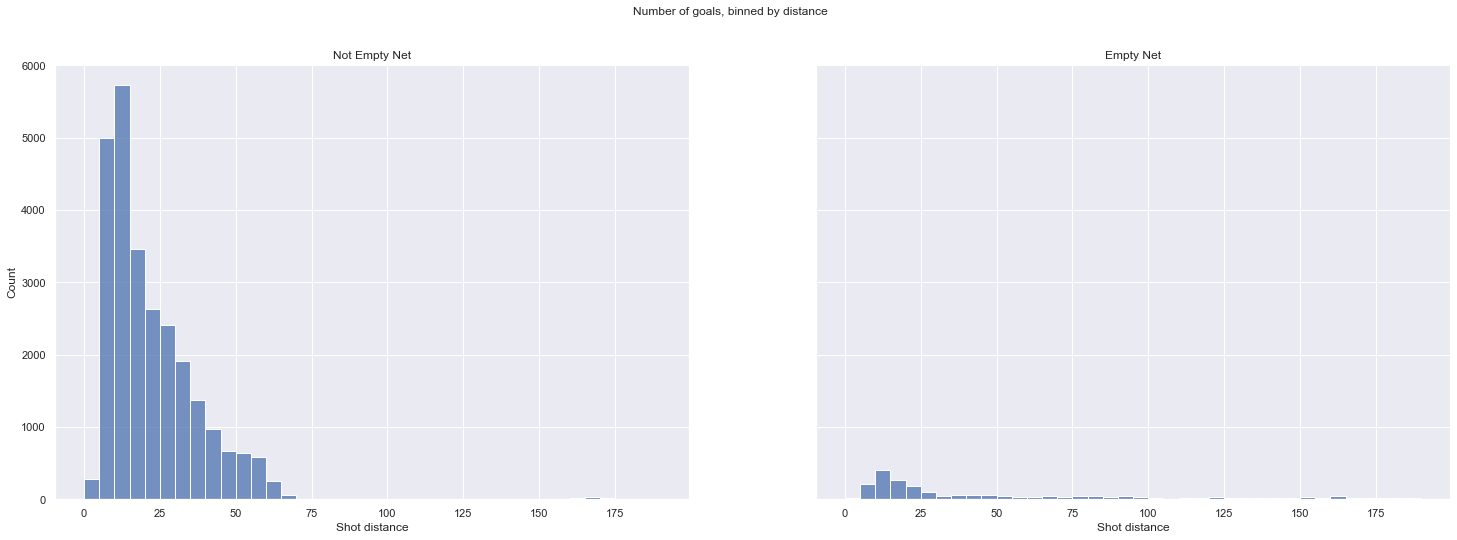

In [38]:
# Q3
df_goals = df[df['Is Goal'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of goals, binned by distance')

sns.histplot(ax=axes[0], data=df_goals, x=df_goals[df_goals['Is Empty'] == 0]["Shot distance"], bins=distance_bins)
axes[0].set_title('Not Empty Net')

sns.histplot(ax=axes[1], data=df_goals, x=df_goals[df_goals['Is Empty'] == 1]["Shot distance"], bins=distance_bins)
axes[1].set_title('Empty Net')

In [36]:
# Check for goal in defensive net without empty net
df_goals[(df_goals['Is Empty'] == 0) & (df_goals['st_X'] < -25)]

,Game ID,Event Index,Time,Period,Team,Type,Shot Type,Shooter,Goalie,Strength,...,Last event elapsed time,Last event distance,st_X,st_Y,Shot distance,Shot angle,Is Goal,Is Empty,Angle Bins,Distance Bins
1764,2016020030,241,07:59,3,New York Islanders (NYI),GOAL,Wrist Shot,John Tavares,John Gibson,Even,...,0,107.670795,-33.0,-21.0,123.794184,-9.766679,1,0,"(-0.001, 10.0]","(120.0, 130.0]"
4562,2016020077,145,09:24,2,Edmonton Oilers (EDM),GOAL,Snap Shot,Mark Letestu,Connor Hellebuyck,Short Handed,...,6,118.207445,-76.0,2.0,165.012121,0.694460,1,0,"(-0.001, 10.0]","(160.0, 170.0]"
4563,2016020077,154,11:10,2,Edmonton Oilers (EDM),GOAL,Snap Shot,Darnell Nurse,Connor Hellebuyck,Even,...,4,114.982607,-79.0,8.0,168.190368,2.726311,1,0,"(-0.001, 10.0]","(160.0, 170.0]"
4564,2016020077,187,17:16,2,Edmonton Oilers (EDM),GOAL,Snap Shot,Zack Kassian,Connor Hellebuyck,Even,...,2,19.235384,-73.0,16.0,162.788206,5.640549,1,0,"(-0.001, 10.0]","(160.0, 170.0]"
20724,2016020342,126,02:10,2,New York Islanders (NYI),GOAL,Tip-In,Jason Chimera,Matt Murray,Even,...,1,110.168053,-37.0,-16.0,127.011810,-7.236922,1,0,"(-0.001, 10.0]","(120.0, 130.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287166,2019020902,201,19:18,2,Colorado Avalanche (COL),GOAL,Wrist Shot,Samuel Girard,Jonathan Quick,Even,...,1,15.652476,-52.0,11.0,141.428427,4.460848,1,0,"(-0.001, 10.0]","(140.0, 150.0]"
287167,2019020902,292,19:05,3,Los Angeles Kings (LAK),GOAL,Wrist Shot,Tyler Toffoli,Pavel Francouz,Even,...,5,21.189620,-62.0,-2.0,151.013244,-0.758840,1,0,"(-0.001, 10.0]","(150.0, 160.0]"
292395,2019020989,35,08:19,1,Minnesota Wild (MIN),GOAL,Wrist Shot,Ryan Donato,Jimmy Howard,Even,...,0,153.003268,-76.0,-3.0,165.027270,-1.041627,1,0,"(-0.001, 10.0]","(160.0, 170.0]"
293050,2019021001,176,13:14,2,Los Angeles Kings (LAK),GOAL,Wrist Shot,Dustin Brown,Mackenzie Blackwood,Even,...,4,47.539457,-77.0,5.0,166.075284,1.725255,1,0,"(-0.001, 10.0]","(160.0, 170.0]"
